In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
%matplotlib notebook

In [3]:
info_path="../../forced_lightcurves/sample_lc_v2/"
salt_df = pd.read_csv(info_path + "../../Nobs_cut_salt2_spec_subtype_pec.csv")
res = pd.read_csv('results_40percent.csv')

res_tsquared = pd.read_csv('results_40_tsquared.csv')

In [4]:
normal = np.where((salt_df['Ia subtype'] != 'Ia-CSM') & 
                  (salt_df['Ia subtype'] != 'SC') & 
                  (salt_df['Ia subtype'] != 'SC*') & 
                  (salt_df['Ia subtype'] != '86G-like') & 
                  (salt_df['Ia subtype'] != '02cx-like'))
good = np.where(res.final_selection.values == 1)
has_host_z = np.where(salt_df.z_source != 'Msl')

normal_good = np.intersect1d(normal, good)
normal_good_host = np.intersect1d(normal_good, has_host_z)

# rearange for plotting
normal_plot = np.setdiff1d(normal[0], normal_good)
normal_good_plot = np.setdiff1d(normal_good, normal_good_host)

print('there are {} normal SNe in sample'.format(len(normal[0])))
print('there are {} normal-reliable SNe in sample'.format(len(normal_good)))
print('there are {} normal-reliable-zhost SNe in sample'.format(len(normal_good_host)))

there are 120 normal SNe in sample
there are 47 normal-reliable SNe in sample
there are 25 normal-reliable-zhost SNe in sample


In [5]:
# plotting dictionary
color_dict = {'orange': '#F0810F',
              'blueberry': '#063852',
              'dark navy': '#011A27'}

## Make plot of evolution

<IPython.core.display.Javascript object>


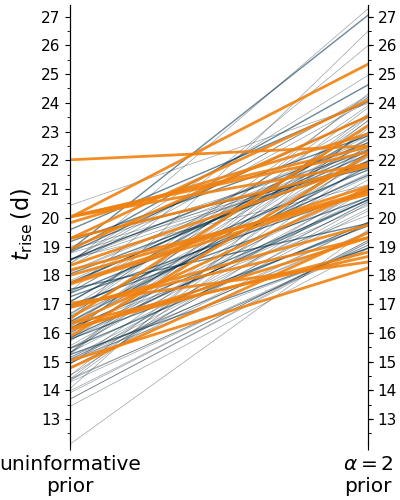

In [6]:
import matplotlib 
matplotlib.rc('xtick', labelsize=14.5)

fig, ax = plt.subplots(figsize=(4,5))

for uni, ts in zip(res.iloc[normal_good_host].t_rise_50.values, 
                   res_tsquared.iloc[normal_good_host].t_rise_50.values):
    ax.plot([0,1], [uni, ts], lw=2, color=color_dict['orange'], alpha=0.9, zorder=100)
for uni, ts in zip(res.iloc[normal_good_plot].t_rise_50.values, 
                   res_tsquared.iloc[normal_good_plot].t_rise_50.values):
    ax.plot([0,1], [uni, ts], lw=1, color=color_dict['blueberry'], alpha=0.6)
for uni, ts in zip(res.iloc[normal_plot].t_rise_50.values, 
                   res_tsquared.iloc[normal_plot].t_rise_50.values):
    ax.plot([0,1], [uni, ts], lw=0.5, color=color_dict['dark navy'], alpha=0.4)

ax.set_xlim(0,1)
ax.set_xticks([0,1])
ax.set_xticklabels(['uninformative\nprior', r'$\alpha = 2$' + '\nprior'],
                   rotation=0, ha='center', ma='center')
ax.set_ylabel(r'$t_\mathrm{rise}\,\mathrm{(d)}$', fontsize=16)



ax2 = ax.twinx()
for a in [ax, ax2]:
    a.tick_params(axis='y', which='both', right=True, labelsize=11, top=False)
    a.yaxis.set_major_locator(MultipleLocator(1))
    a.yaxis.set_minor_locator(MultipleLocator(0.5))
    a.set_ylim(12.1,27.4)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)

fig.subplots_adjust(left=0.175,top=0.99,right=0.92)
fig.savefig('../paper/figures/trise_vs_prior.pdf')

In [11]:
np.median(res_tsquared.t_rise_50.values - res.t_rise_50.values)

4.899131516245397

In [12]:
normal = np.where((salt_df['Ia subtype'] != 'Ia-CSM') & 
                  (salt_df['Ia subtype'] != 'SC') & 
                  (salt_df['Ia subtype'] != 'SC*') & 
                  (salt_df['Ia subtype'] != '86G-like') & 
                  (salt_df['Ia subtype'] != '02cx-like'))
good = np.where(res.final_selection.values == 1)
has_host_z = np.where(salt_df.z_source != 'Msl')

normal_good = np.intersect1d(normal, good)
normal_good_host = np.intersect1d(normal_good, has_host_z)

low_z = np.where(salt_df.z_adopt < 0.06)
normal_good_host_lowz = np.intersect1d(low_z, normal_good_host)


In [14]:
np.median((res_tsquared.t_rise_50.values - res.t_rise_50.values)[normal_good_host_lowz])

2.8808182161593514